<a href="https://colab.research.google.com/github/FlorenceMawusi/Disease-Prediction/blob/main/Disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Imports

import numpy as np
from google.colab import drive
import pandas as pd

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from keras.utils import to_categorical
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# Explore data

In [ ]:
#Load disease data from drive
train_data = pd.read_csv('/content/drive/MyDrive/Colab/Machine Learning Internship MIP-ML-11/Disease Prediction/Train_data.csv', delimiter=',')
test_data = pd.read_csv('/content/drive/MyDrive/Colab/Machine Learning Internship MIP-ML-11/Disease Prediction/test_data.csv', delimiter=',')

In [ ]:

train_data.head(5)

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse


In [ ]:
test_data.head(5)

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.001827,0.033693,0.114755,0.997927,0.562604,0.866499,0.578042,0.914615,0.026864,0.038641,...,0.653230,0.186104,0.430398,0.016678,0.885352,0.652733,0.788235,0.054788,0.031313,Thalasse
1,0.436679,0.972653,0.084998,0.180909,0.675736,0.563889,0.798382,0.670361,0.376092,0.184890,...,0.833540,0.153001,0.458533,0.401845,0.635969,0.574425,0.047025,0.607985,0.594123,Diabetes
2,0.545697,0.324815,0.584467,0.475748,0.558596,0.661007,0.934056,0.381782,0.500342,0.531829,...,0.678901,0.220479,0.817151,0.690981,0.101633,0.855740,0.551124,0.413294,0.070909,Heart Di
3,0.172994,0.050351,0.736000,0.782022,0.069435,0.085219,0.032907,0.460619,0.785448,0.491495,...,0.381500,0.459396,0.420154,0.798537,0.399236,0.324600,0.499504,0.436662,0.242766,Diabetes
4,0.758534,0.739968,0.597868,0.772683,0.875720,0.860265,0.486189,0.486686,0.621048,0.191756,...,0.993381,0.272338,0.663579,0.265227,0.918847,0.804910,0.571119,0.188368,0.750848,Heart Di


In [ ]:
# How many categories are in the target variable
train_data['Disease'].value_counts()

Disease
Anemia      623
Healthy     556
Diabetes    540
Thalasse    509
Thromboc    123
Name: count, dtype: int64

In [ ]:
# How many categories are in the target variable
test_data['Disease'].value_counts()

Disease
Diabetes    294
Anemia       84
Thalasse     48
Heart Di     39
Thromboc     16
Healthy       5
Name: count, dtype: int64

In [ ]:
# prompt: # Take out the 'Heart Di' test examples since we do not have those in the
# # training examples.

test_data = test_data.drop(test_data.loc[test_data['Disease'] == 'Heart Di'].index)


In [ ]:
# prompt: Check if there are missing values in train_data and test_data

print('Train data missing values:', train_data.isnull().sum())
print('Test data missing values:', test_data.isnull().sum())


Train data missing values: Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                       

In [ ]:
# Check for duplicate rows
print('Train data duplicate rows:', train_data.duplicated().sum())
print('Test data duplicate rows:', test_data.duplicated().sum())
print('Train and Test data duplicate rows:', pd.concat([train_data, test_data]).duplicated().sum())


Train data duplicate rows: 2286
Test data duplicate rows: 0
Train and Test data duplicate rows: 2286


In [ ]:
# Take out duplicate rows in train_data

train_data = train_data.drop_duplicates()
print('Train data duplicate rows:', train_data.duplicated().sum())


Train data duplicate rows: 0


<Axes: xlabel='Disease'>

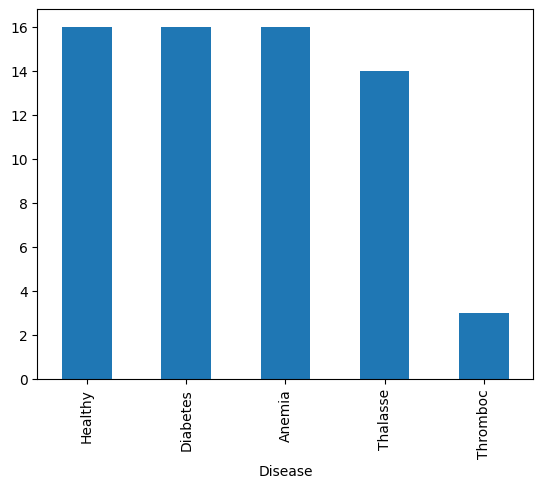

In [ ]:
# Check for the distribution of target variable in train data
train_data['Disease'].value_counts().plot(kind='bar')

In [ ]:
# prompt: do some exploratory data analysis on train_data and test_data


# Check for the correlation between numerical features
train_data.drop('Disease', axis=1).corr()

# Perform any other exploratory data analysis techniques as needed


,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
Glucose,1.000000,0.199848,0.131658,0.102414,0.040146,-0.035723,0.187848,0.028006,-0.118320,0.056465,...,-0.160775,0.049684,0.094025,-0.144526,0.002351,-0.063084,0.021454,-0.217788,0.195723,0.222067
Cholesterol,0.199848,1.000000,0.181202,0.016947,0.007614,0.144612,0.093144,-0.060669,-0.276457,0.150594,...,0.132231,0.053271,0.158470,0.128175,0.031892,0.149161,-0.158558,-0.008452,-0.087639,-0.196230
Hemoglobin,0.131658,0.181202,1.000000,0.144952,0.064295,0.027582,-0.003213,-0.140412,0.184339,0.020720,...,0.109772,0.069695,0.270541,-0.022228,0.011705,-0.108896,0.033904,-0.029450,-0.085611,-0.043709
Platelets,0.102414,0.016947,0.144952,1.000000,-0.076228,0.014896,-0.182602,0.138692,-0.060768,-0.013018,...,-0.244200,0.116212,-0.183436,-0.195463,-0.072805,0.085171,-0.079869,-0.005577,-0.017036,0.014317
White Blood Cells,0.040146,0.007614,0.064295,-0.076228,1.000000,0.093834,0.247522,-0.017649,0.015030,-0.024235,...,0.091973,0.049067,-0.020647,-0.038571,0.004796,0.172244,0.194334,0.040959,-0.132281,0.027447
Red Blood Cells,-0.035723,0.144612,0.027582,0.014896,0.093834,1.000000,-0.096712,-0.146411,-0.039066,-0.120787,...,0.061811,0.116524,0.198737,0.274500,0.155611,-0.164479,0.054891,-0.129000,-0.136720,-0.168959
Hematocrit,0.187848,0.093144,-0.003213,-0.182602,0.247522,-0.096712,1.000000,0.073499,-0.084343,0.018534,...,-0.117640,-0.037469,-0.029040,0.011335,-0.060697,-0.098729,-0.116441,-0.051934,0.161351,-0.066107
Mean Corpuscular Volume,0.028006,-0.060669,-0.140412,0.138692,-0.017649,-0.146411,0.073499,1.000000,-0.045322,0.136329,...,-0.155732,-0.061262,-0.216203,-0.099890,0.053771,-0.025888,-0.195077,0.001798,0.139972,-0.092775
Mean Corpuscular Hemoglobin,-0.118320,-0.276457,0.184339,-0.060768,0.015030,-0.039066,-0.084343,-0.045322,1.000000,-0.019025,...,0.073924,-0.129955,0.186398,-0.027723,-0.126888,0.100514,0.051484,-0.153581,-0.182509,0.057285
Mean Corpuscular Hemoglobin Concentration,0.056465,0.150594,0.020720,-0.013018,-0.024235,-0.120787,0.018534,0.136329,-0.019025,1.000000,...,0.121983,0.146925,0.139421,-0.090530,-0.219251,0.056554,-0.102413,0.055707,0.088045,0.038235


In [ ]:
#How many train and test examples do we have

train_data_len = len(train_data)
test_data_len = len(test_data)

print(f'We have {train_data_len} training examples and {test_data_len} test examples')

We have 65 training examples and 447 test examples


#Training and Evaluation

In [ ]:
# Split train_data into X and y
X_train = train_data.drop('Disease', axis=1)
y_train = train_data['Disease']

# Split test_data into X and y
X_test = test_data.drop('Disease', axis=1)
y_test = test_data['Disease']


# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Label Encoding
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [ ]:
# prompt: use grid search to find the best hyperparameters


# Define the parameter grid
param_grid = {
    'solver': ['newton-cg', 'liblinear', 'lbfgs', 'sag', 'saga'],
    'max_iter': [300, 500, 1000]
}

# Create the LogisticRegression model
clf = LogisticRegression()

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Print the best parameters
print(grid_search.best_params_)


{'max_iter': 300, 'solver': 'newton-cg'}


##Logistic Regression

In [ ]:
# prompt: train a disease prediction model with train_data. Target is 'Disease'. Evaluate model using accuracy,  precision, recall, f1score, AUC score. Evaluate on 'test_data'


# Train a Logistic Regression model
model = LogisticRegression(solver='newton-cg', max_iter=300)
model.fit(X_train, y_train)

# Evaluate the model on test_data
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
report = classification_report(y_test, y_pred, zero_division='warn')

# Encode the target values
lb = LabelBinarizer()
y_test_encoded_lb = lb.fit_transform(y_test)
y_pred_encoded_lb = lb.transform(y_pred)

# Calculate the AUC score
auc = roc_auc_score(y_test_encoded_lb, y_pred_encoded_lb, multi_class='ovo')

print(f'Classification report: {report}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'AUC Score: {auc}')


Classification report:               precision    recall  f1-score   support

           0       0.33      0.43      0.38        84
           1       0.71      0.41      0.52       294
           2       0.03      0.60      0.06         5
           3       0.11      0.12      0.12        48
           4       0.25      0.25      0.25        16

    accuracy                           0.38       447
   macro avg       0.29      0.36      0.26       447
weighted avg       0.55      0.38      0.44       447

Accuracy: 0.38031319910514544
Precision: 0.5519992662511416
Recall: 0.38031319910514544
F1 Score: 0.4357309334643013
AUC Score: 0.593118995968162


## SVM

In [ ]:
# prompt: train an SVM disease prediction model with train_data. Target is 'Disease'. Evaluate model using accuracy,  precision, recall, f1score, AUC score. Evaluate on 'test_data'

from sklearn.svm import SVC

# Define the hyperparameter grid
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': ['scale', 'auto']
}

# Create a grid search object
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

# Create the SVM model
model = SVC(kernel='linear', C=0.1, gamma='scale')

# Train the model
model.fit(X_train, y_train)

# Evaluate the model on test_data
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
report = classification_report(y_test, y_pred, zero_division='warn')

# Encode the target values
lb = LabelBinarizer()
y_test_encoded = lb.fit_transform(y_test)
y_pred_encoded = lb.transform(y_pred)

# Calculate the AUC score
auc = roc_auc_score(y_test_encoded, y_pred_encoded, multi_class='ovo')

print(f'Classification report: {report}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'AUC Score: {auc}')


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Classification report:               precision    recall  f1-score   support

           0       0.34      0.44      0.39        84
           1       0.74      0.43      0.54       294
           2       0.02      0.40      0.04         5
           3       0.12      0.15      0.13        48
           4       0.08      0.06      0.07        16

    accuracy                           0.39       447
   macro avg       0.26      0.30      0.23       447
weighted avg       0.57      0.39      0.45       447

Accuracy: 0.3870246085011186
Precision: 0.5656436019205359
Recall: 0.3870246085011186
F1 Score: 0.44630627304907455
AUC Score: 0.5617622502499977


# Neural network

In [ ]:
# prompt: train  and evaluate a neural network with one two layers and two neurons in each layer with train_data and test_data

# Import necessary libraries
import numpy as np
from sklearn.neural_network import MLPClassifier

# Define the training data
X_train = train_data.drop('Disease', axis=1)
y_train = train_data['Disease']

# Define the test data
X_test = test_data.drop('Disease', axis=1)
y_test = test_data['Disease']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Define the neural network model
model = MLPClassifier(hidden_layer_sizes=(2, 2), activation='logistic',
                      solver='adam', max_iter=2000, learning_rate_init=0.0001)

# Train the model
model.fit(X_train_scaled, y_train)

# Evaluate the model on the test data
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)

report = classification_report(y_test, y_pred, zero_division='warn')

print(f'Accuracy: {accuracy}')
print(report)


Accuracy: 0.18791946308724833
              precision    recall  f1-score   support

      Anemia       0.19      1.00      0.32        84
    Diabetes       0.00      0.00      0.00       294
     Healthy       0.00      0.00      0.00         5
    Thalasse       0.00      0.00      0.00        48
    Thromboc       0.00      0.00      0.00        16

    accuracy                           0.19       447
   macro avg       0.04      0.20      0.06       447
weighted avg       0.04      0.19      0.06       447



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Tuning a Large Language Model

##Train on Training Data

In [ ]:
# The training data is too small so using a large language model might be helpful.

In [ ]:
import os
if 'COLAB_RELEASE_TAG' in os.environ:
  from google.colab import userdata
  import pathlib
  pathlib.Path('client_secret.json').write_text(userdata.get('CLIENT_SECRET'))

  # Use `--no-browser` in colab
  !gcloud auth application-default login --no-browser --client-id-file=client_secret.json --scopes='https://www.googleapis.com/auth/cloud-platform,https://www.googleapis.com/auth/generative-language.tuning'
else:
  !gcloud auth application-default login --client-id-file=client_secret.json --scopes='https://www.googleapis.com/auth/cloud-platform,https://www.googleapis.com/auth/generative-language.tuning'

You are authorizing client libraries without access to a web browser. Please run the following command on a machine with a web browser and copy its output back here. Make sure the installed gcloud version is 372.0.0 or newer.

gcloud auth application-default login --remote-bootstrap="https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=631589705409-u5dnnu7hn0fm3k1u3eupd07cqto44e1n.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fgenerative-language.tuning&state=zeMIKSrm87bj05CmVn8KNSCvwX62AE&access_type=offline&code_challenge=svLtZKabExPq5vRepOF7WZ5y5o9d4ypKOeLLeTBqBoc&code_challenge_method=S256&token_usage=remote"


Enter the output of the above command: https://localhost:8085/?state=zeMIKSrm87bj05CmVn8KNSCvwX62AE&code=4/0AdLIrYclIBD21h0L7h4B_yQTZ3qVxEq_S2GQTzwCa9DUGo-rS9EqAJours6g7Vegzi7u9A&scope=https://www.googleapis.com/auth/cloud-platform%20https://www.googleapis.com/auth/generati

In [ ]:
!pip install -q google-generativeai

In [ ]:
import google.generativeai as genai

In [ ]:
for i, m in zip(range(5), genai.list_tuned_models()):
  print(m.name)

In [ ]:
# Create Tuned Model
base_model = [
    m for m in genai.list_models()
    if "createTunedModel" in m.supported_generation_methods][0]
base_model

Model(name='models/gemini-1.0-pro-001',
      base_model_id='',
      version='001',
      display_name='Gemini 1.0 Pro 001 (Tuning)',
      description=('The best model for scaling across a wide range of tasks. This is a stable '
                   'model that supports tuning.'),
      input_token_limit=30720,
      output_token_limit=2048,
      supported_generation_methods=['generateContent', 'countTokens', 'createTunedModel'],
      temperature=0.9,
      top_p=1.0,
      top_k=None)

In [ ]:
# Prepare training data and test data
# Format will be a list of dictionaries with 'text_input' and 'output' as keys.

# Function to transform each row into a mapping
def transform_row(row):
    input_str = ', '.join([f'{col} = {str(row[col])}' for col in train_data.columns if col != 'Disease'])
    output_str = (row['Disease'])
    return {'text_input': input_str, 'output': output_str}


# Apply the function to each row and convert to list
train_mappings = [transform_row(row) for _, row in train_data.iterrows()]
test_mappings = [transform_row(row) for _, row in test_data.iterrows()]

# Print the result
for mapping in test_mappings:
    print(mapping)



In [ ]:
# fine tune the model

import random

name = f'disease-pred-{random.randint(0,10000)}'
operation = genai.create_tuned_model(
    source_model=base_model.name,
    training_data=train_mappings,
    id = name,
    epoch_count = 100,
    batch_size=4,
    learning_rate=0.001,
)

In [ ]:
model = genai.get_tuned_model(f'tunedModels/{name}')

#train = 6771
model

TunedModel(name='tunedModels/disease-pred-6771',
           source_model='models/gemini-1.0-pro-001',
           base_model='models/gemini-1.0-pro-001',
           display_name='',
           description='',
           temperature=0.9,
           top_p=1.0,
           top_k=0,
           state=<State.CREATING: 1>,
           create_time=datetime.datetime(2024, 5, 21, 9, 35, 23, 714657, tzinfo=datetime.timezone.utc),
           update_time=datetime.datetime(2024, 5, 21, 9, 35, 23, 714657, tzinfo=datetime.timezone.utc),
           tuning_task=TuningTask(start_time=datetime.datetime(2024, 5, 21, 9, 35, 24, 233065, tzinfo=datetime.timezone.utc),
                                  complete_time=None,
                                  snapshots=[],
                                  hyperparameters=Hyperparameters(epoch_count=100,
                                                                  batch_size=4,
                                                                  learning_rate=0.001

In [ ]:
model.state

<State.CREATING: 1>

### Check tuning progress

In [ ]:
operation.metadata

total_steps: 1625
tuned_model: "tunedModels/disease-pred-6771"

In [ ]:
import time

for status in operation.wait_bar():
  time.sleep(30)

  0%|          | 0/1625 [00:00<?, ?it/s]

<Axes: xlabel='epoch', ylabel='mean_loss'>

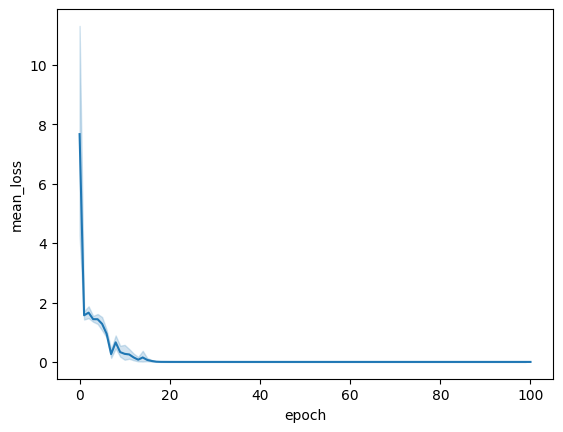

In [ ]:
# View the loss curve from the tuning results.
import seaborn as sns

model = operation.result()

snapshots = pd.DataFrame(model.tuning_task.snapshots)

sns.lineplot(data=snapshots, x = 'epoch', y='mean_loss')


### Evaluate model


In [ ]:
model = genai.GenerativeModel(model_name=f'tunedModels/{name}')

In [ ]:
test_mappings[0]['text_input']


'Glucose = 0.0018274909610678, Cholesterol = 0.0336927112651197, Hemoglobin = 0.1147552483260163, Platelets = 0.9979265826318756, White Blood Cells = 0.5626042497972953, Red Blood Cells = 0.8664985191378527, Hematocrit = 0.5780417725757974, Mean Corpuscular Volume = 0.9146154943239128, Mean Corpuscular Hemoglobin = 0.0268640867660021, Mean Corpuscular Hemoglobin Concentration = 0.0386409149011637, Insulin = 0.6457546146300869, BMI = 0.070887634868884, Systolic Blood Pressure = 0.6166837258205815, Diastolic Blood Pressure = 0.1680306239509201, Triglycerides = 0.9701679067369816, HbA1c = 0.6532298817103617, LDL Cholesterol = 0.1861044565971867, HDL Cholesterol = 0.4303977818952353, ALT = 0.0166779221361949, AST = 0.8853520232758132, Heart Rate = 0.6527334246274836, Creatinine = 0.7882351408277983, Troponin = 0.0547881128007013, C-reactive Protein = 0.0313134366273335'

In [ ]:
for i in range(len(test_mappings)):
  result = model.generate_content(test_mappings[i]['text_input'])
  if result.text != 'Healthy':
    print(i)


447

In [ ]:
result = model.generate_content(test_mappings[6]['text_input'])
print(f'Prediction: {result.text}')
print(f"Observed: {test_mappings[6]['output']}")

Prediction: Healthy
Observed: Anemia


In [ ]:
result = model.generate_content(test_mappings[1]['text_input'])
print(f'Prediction: {result.text}')
print(f"Observed: {test_mappings[1]['output']}")

Prediction: Healthy
Observed: Diabetes


In [ ]:
result = model.generate_content(test_mappings[2]['text_input'])
print(f'Prediction: {result.text}')
print(f"Observed: {test_mappings[2]['output']}")

Prediction: Healthy
Observed: Diabetes


In [ ]:
result = model.generate_content(test_mappings[5]['text_input'])
print(f'Prediction: {result.text}')
print(f"Observed: {test_mappings[5]['output']}")

Prediction: Healthy
Observed: Diabetes


In [ ]:
result = model.generate_content(test_mappings[200]['text_input'])
print(f'Prediction: {result.text}')
print(f"Observed: {test_mappings[200]['output']}")

Prediction: Healthy
Observed: Diabetes


In [ ]:
result = model.generate_content(test_mappings[120]['text_input'])
print(f'Prediction: {result.text}')
print(f"Observed: {test_mappings[120]['output']}")

Prediction: Healthy
Observed: Diabetes


In [ ]:
train_data[train_data['Disease'] == 'Healthy']

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
14,0.377112,0.391959,0.577246,0.573482,0.685303,0.605134,0.472465,0.098744,0.721378,0.319725,...,0.646206,0.657711,0.307132,0.261195,0.404761,0.599542,0.477714,0.277383,0.607319,Healthy
23,0.693767,0.730686,0.751196,0.747326,0.742084,0.413056,0.820138,0.140164,0.756092,0.488189,...,0.755660,0.603351,0.381331,0.274330,0.443498,0.518567,0.645247,0.088596,0.751157,Healthy
44,0.348493,0.312579,0.284949,0.412179,0.916696,0.258357,0.758897,0.179695,0.257735,0.709610,...,0.461701,0.577602,0.538216,0.090484,0.189425,0.454870,0.515557,0.490241,0.770657,Healthy
45,0.106993,0.277024,0.776516,0.638554,0.819277,0.257666,0.751106,0.304968,0.770577,0.501131,...,0.447073,0.527456,0.241536,0.125287,0.768934,0.898209,0.566370,0.221571,0.192080,Healthy
53,0.799282,0.447299,0.325035,0.825397,0.259467,0.743670,0.434097,0.198072,0.189896,0.305185,...,0.430389,0.247775,0.856870,0.710319,0.544838,0.413037,0.021239,0.134822,0.059388,Healthy
56,0.582278,0.114633,0.846266,0.736968,0.487405,0.904046,0.394547,0.065926,0.687458,0.459895,...,0.533627,0.713441,0.420996,0.211078,0.611674,0.928161,0.147385,0.751778,0.571952,Healthy
64,0.357817,0.250056,0.466870,0.624206,0.618684,0.545752,0.245236,0.453052,0.162934,0.670361,...,0.537799,0.411453,0.484999,0.235162,0.566215,0.403785,0.737241,0.388105,0.406190,Healthy
69,0.254839,0.125606,0.964963,0.580719,0.815725,0.458429,0.893228,0.429131,0.195760,0.694565,...,0.025010,0.422977,0.759931,0.651537,0.076343,0.510846,0.558042,0.228078,0.358865,Healthy
70,0.298550,0.182145,0.701824,0.418574,0.875773,0.660344,0.977520,0.459985,0.717812,0.677143,...,0.237960,0.437792,0.490455,0.029745,0.565996,0.433284,0.095771,0.283121,0.632352,Healthy


In [ ]:
test_data[test_data['Disease'] == 'Healthy']

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
237,0.349509,0.468067,0.787240,0.253130,0.605211,0.879878,0.791565,0.411967,0.753353,0.266736,...,0.334439,0.767408,0.242566,0.332557,0.600001,0.926186,0.410981,0.697816,0.719061,Healthy
278,0.683867,0.283787,0.871859,0.276666,0.509281,0.754693,0.358302,0.287738,0.123325,0.575946,...,0.667253,0.562304,0.342960,0.738620,0.252171,0.286047,0.673511,0.022219,0.726251,Healthy
331,0.274307,0.544493,0.111304,0.659944,0.516759,0.751746,1.000342,0.288068,0.172800,0.106276,...,0.968774,0.007447,0.485621,0.234091,0.920128,0.896201,0.030313,0.087107,0.012154,Healthy
387,0.346893,0.070017,0.774610,0.695949,0.405680,0.328027,0.561552,0.295210,-0.000614,0.041211,...,0.279864,0.124631,0.426872,0.741719,0.143121,0.570486,0.279109,0.407125,0.048804,Healthy
416,0.506226,0.192274,0.622622,0.539111,0.378529,0.676623,0.817650,0.031509,0.075070,0.516964,...,0.810628,0.330362,0.460166,0.067661,0.481001,0.428250,0.873290,0.335435,0.504189,Healthy


It really seems to have picked up the task despite the limited examples, but "next" is a simple concept, see the [tuning guide](https://ai.google.dev/gemini-api/docs/model-tuning) for more guidance on improving performance.

##Train on Test Data

In [ ]:
# fine tune the model

import random

name = f'disease-pred-{random.randint(0,10000)}'
operation = genai.create_tuned_model(
    source_model=base_model.name,
    training_data=test_mappings,
    id = name,
    epoch_count = 100,
    batch_size=4,
    learning_rate=0.001,
)

In [3]:
model = genai.get_tuned_model(f'tunedModels/{name}')

#test = 6278
model

NameError: name 'genai' is not defined

In [2]:
model.state

NameError: name 'model' is not defined

### Check tuning progress

In [ ]:
operation.metadata

total_steps: 11175
tuned_model: "tunedModels/disease-pred-6278"

In [1]:
import time

for status in operation.wait_bar():
  time.sleep(30)

NameError: name 'operation' is not defined

In [ ]:
# View the loss curve from the tuning results.
import seaborn as sns

model = operation.result()

snapshots = pd.DataFrame(model.tuning_task.snapshots)

sns.lineplot(data=snapshots, x = 'epoch', y='mean_loss')


### Evaluate model


In [ ]:
model = genai.GenerativeModel(model_name=f'tunedModels/{name}')

In [ ]:
train_mappings[0]['text_input']


'Glucose = 0.0018274909610678, Cholesterol = 0.0336927112651197, Hemoglobin = 0.1147552483260163, Platelets = 0.9979265826318756, White Blood Cells = 0.5626042497972953, Red Blood Cells = 0.8664985191378527, Hematocrit = 0.5780417725757974, Mean Corpuscular Volume = 0.9146154943239128, Mean Corpuscular Hemoglobin = 0.0268640867660021, Mean Corpuscular Hemoglobin Concentration = 0.0386409149011637, Insulin = 0.6457546146300869, BMI = 0.070887634868884, Systolic Blood Pressure = 0.6166837258205815, Diastolic Blood Pressure = 0.1680306239509201, Triglycerides = 0.9701679067369816, HbA1c = 0.6532298817103617, LDL Cholesterol = 0.1861044565971867, HDL Cholesterol = 0.4303977818952353, ALT = 0.0166779221361949, AST = 0.8853520232758132, Heart Rate = 0.6527334246274836, Creatinine = 0.7882351408277983, Troponin = 0.0547881128007013, C-reactive Protein = 0.0313134366273335'

In [ ]:
for i in range(len(train_mappings)):
  result = model.generate_content(train_mappings[i]['text_input'])
  if result.text != 'Healthy':
    print(i)


447

In [ ]:
result = model.generate_content(train_mappings[6]['text_input'])
print(f'Prediction: {result.text}')
print(f"Observed: {train_mappings[6]['output']}")

Prediction: Healthy
Observed: Anemia


In [ ]:
result = model.generate_content(train_mappings[1]['text_input'])
print(f'Prediction: {result.text}')
print(f"Observed: {train_mappings[1]['output']}")

Prediction: Healthy
Observed: Diabetes


In [ ]:
result = model.generate_content(train_mappings[2]['text_input'])
print(f'Prediction: {result.text}')
print(f"Observed: {train_mappings[2]['output']}")

Prediction: Healthy
Observed: Diabetes


In [ ]:
result = model.generate_content(train_mappings[5]['text_input'])
print(f'Prediction: {result.text}')
print(f"Observed: {train_mappings[5]['output']}")

Prediction: Healthy
Observed: Diabetes


In [ ]:
result = model.generate_content(train_mappings[200]['text_input'])
print(f'Prediction: {result.text}')
print(f"Observed: {train_mappings[200]['output']}")

Prediction: Healthy
Observed: Diabetes


In [ ]:
result = model.generate_content(train_mappings[120]['text_input'])
print(f'Prediction: {result.text}')
print(f"Observed: {train_mappings[120]['output']}")

Prediction: Healthy
Observed: Diabetes


In [ ]:
train_data[train_data['Disease'] == 'Healthy']

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
14,0.377112,0.391959,0.577246,0.573482,0.685303,0.605134,0.472465,0.098744,0.721378,0.319725,...,0.646206,0.657711,0.307132,0.261195,0.404761,0.599542,0.477714,0.277383,0.607319,Healthy
23,0.693767,0.730686,0.751196,0.747326,0.742084,0.413056,0.820138,0.140164,0.756092,0.488189,...,0.755660,0.603351,0.381331,0.274330,0.443498,0.518567,0.645247,0.088596,0.751157,Healthy
44,0.348493,0.312579,0.284949,0.412179,0.916696,0.258357,0.758897,0.179695,0.257735,0.709610,...,0.461701,0.577602,0.538216,0.090484,0.189425,0.454870,0.515557,0.490241,0.770657,Healthy
45,0.106993,0.277024,0.776516,0.638554,0.819277,0.257666,0.751106,0.304968,0.770577,0.501131,...,0.447073,0.527456,0.241536,0.125287,0.768934,0.898209,0.566370,0.221571,0.192080,Healthy
53,0.799282,0.447299,0.325035,0.825397,0.259467,0.743670,0.434097,0.198072,0.189896,0.305185,...,0.430389,0.247775,0.856870,0.710319,0.544838,0.413037,0.021239,0.134822,0.059388,Healthy
56,0.582278,0.114633,0.846266,0.736968,0.487405,0.904046,0.394547,0.065926,0.687458,0.459895,...,0.533627,0.713441,0.420996,0.211078,0.611674,0.928161,0.147385,0.751778,0.571952,Healthy
64,0.357817,0.250056,0.466870,0.624206,0.618684,0.545752,0.245236,0.453052,0.162934,0.670361,...,0.537799,0.411453,0.484999,0.235162,0.566215,0.403785,0.737241,0.388105,0.406190,Healthy
69,0.254839,0.125606,0.964963,0.580719,0.815725,0.458429,0.893228,0.429131,0.195760,0.694565,...,0.025010,0.422977,0.759931,0.651537,0.076343,0.510846,0.558042,0.228078,0.358865,Healthy
70,0.298550,0.182145,0.701824,0.418574,0.875773,0.660344,0.977520,0.459985,0.717812,0.677143,...,0.237960,0.437792,0.490455,0.029745,0.565996,0.433284,0.095771,0.283121,0.632352,Healthy


In [ ]:
test_data[test_data['Disease'] == 'Healthy']

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
237,0.349509,0.468067,0.787240,0.253130,0.605211,0.879878,0.791565,0.411967,0.753353,0.266736,...,0.334439,0.767408,0.242566,0.332557,0.600001,0.926186,0.410981,0.697816,0.719061,Healthy
278,0.683867,0.283787,0.871859,0.276666,0.509281,0.754693,0.358302,0.287738,0.123325,0.575946,...,0.667253,0.562304,0.342960,0.738620,0.252171,0.286047,0.673511,0.022219,0.726251,Healthy
331,0.274307,0.544493,0.111304,0.659944,0.516759,0.751746,1.000342,0.288068,0.172800,0.106276,...,0.968774,0.007447,0.485621,0.234091,0.920128,0.896201,0.030313,0.087107,0.012154,Healthy
387,0.346893,0.070017,0.774610,0.695949,0.405680,0.328027,0.561552,0.295210,-0.000614,0.041211,...,0.279864,0.124631,0.426872,0.741719,0.143121,0.570486,0.279109,0.407125,0.048804,Healthy
416,0.506226,0.192274,0.622622,0.539111,0.378529,0.676623,0.817650,0.031509,0.075070,0.516964,...,0.810628,0.330362,0.460166,0.067661,0.481001,0.428250,0.873290,0.335435,0.504189,Healthy


It really seems to have picked up the task despite the limited examples, but "next" is a simple concept, see the [tuning guide](https://ai.google.dev/gemini-api/docs/model-tuning) for more guidance on improving performance.